euclidean_distance(x1,x2)=170.5608395851756


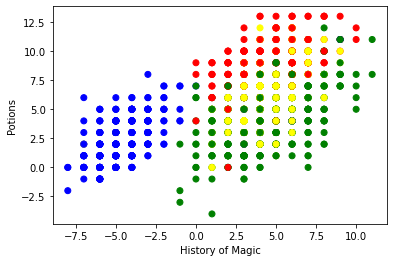

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import math

del_labels = ["First Name", "Last Name", 'Birthday', "Best Hand", "Index"]
with open("dataset_train.csv") as file:
    rows_list = file.read().splitlines()
    col_dict = {}
    labels = rows_list[0].split(',')
    for label in labels:
        col_dict[label] = []
    skip_ind = set()
    for row_ind in range(len(rows_list[1:])):
        values = rows_list[row_ind + 1].split(",")
        for index in range(len(col_dict)):
            col_dict[labels[index]].append(values[index])

def find_ind_empty(dct):
    # print(dct.keys())
    set_empty_val = set()
    for key, val_list in dct.items():
        for val_ind in range(len(val_list)):
            if val_list[val_ind] == '':
                set_empty_val.add(val_ind)
    return set_empty_val

def clean_empty_vals(dct):
    clean_ind = find_ind_empty(dct)
    tmp_dct = {}
    for key in dct.keys():
        tmp_dct[key] = []
    
        
    for key, val_list in dct.items():
        for val_ind in range(len(val_list)):
            if val_ind not in clean_ind:
                tmp_dct[key].append(val_list[val_ind])
    return tmp_dct

def convert_to_int(dct):
    for key, val_list in dct.items():
        for val_ind in range(len(val_list)):
            if key != "Hogwarts House":
                val_list[val_ind] = int(float(val_list[val_ind]))
    return dct

def get_majors(lst):
    majors = list(set(lst))
    colors = ['blue', 'green', 'yellow', 'red']
    majors_dct = dict()
    for major_ind in range(len(majors)):
        majors_dct[majors[major_ind]] = colors[major_ind]
    return majors_dct

def get_colors_dict(tmp_dct):
    colors_major = get_majors(tmp_dct["Hogwarts House"])
    tmp_dct["color"] = []
    for major in tmp_dct["Hogwarts House"]:
        tmp_dct["color"].append(colors_major[major])
    return tmp_dct["color"]

for label in del_labels:
    col_dict.pop(label)
tmp_dct = {}
tmp_col1 = None
tmp_col2 = None
val_min = None
for col_1 in col_dict.keys():
    for col_2 in col_dict.keys():
        if col_1 != col_2 and col_1 != "Hogwarts House" and col_2 != "Hogwarts House":
            tmp_dct = {"Hogwarts House": col_dict["Hogwarts House"], col_1:col_dict[col_1], col_2:col_dict[col_2]}
            tmp_dct = clean_empty_vals(tmp_dct)
            tmp_dct = convert_to_int(tmp_dct)

            colors = get_colors_dict(tmp_dct)
            colors = ['blue', 'green', 'yellow', 'red']
            if val_min == None or math.sqrt(sum(pow(a-b,2) for a, b in zip(tmp_dct[col_1], tmp_dct[col_2]))) < val_min:
                val_min = math.sqrt(sum(pow(a-b,2) for a, b in zip(tmp_dct[col_1], tmp_dct[col_2])))
                tmp_col1 = col_1
                tmp_col2 = col_2
                save_tmp_dict = tmp_dct
print(f"euclidean_distance(x1,x2)={val_min}")
plt.xlabel(tmp_col1)
plt.ylabel(tmp_col2)
plt.scatter(save_tmp_dict[tmp_col1], save_tmp_dict[tmp_col2], c=save_tmp_dict["color"], cmap=matplotlib.colors.ListedColormap(tmp_dct["color"]))
plt.show()


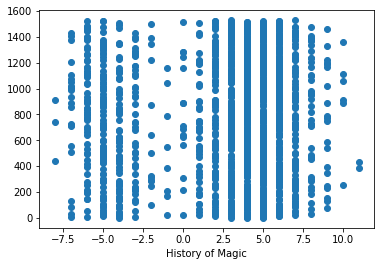

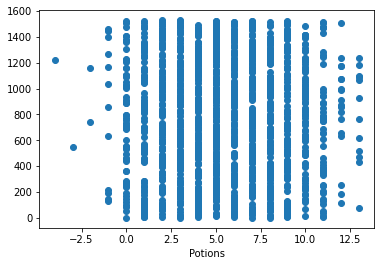

In [2]:
plt.xlabel(tmp_col1)
plt.scatter(save_tmp_dict[tmp_col1], [x for x in range(len(save_tmp_dict[tmp_col1]))])
plt.show()
plt.xlabel(tmp_col2)
plt.scatter(save_tmp_dict[tmp_col2], [x for x in range(len(save_tmp_dict[tmp_col2]))])
plt.show()